In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [2]:
df_final = pd.read_csv("D123.csv",na_values=['null'],parse_dates=True,infer_datetime_format=True)

In [9]:
import os
os.getcwd()

'C:\\Users\\chiaming\\Desktop\\python'

In [ ]:
pd.read_excel('A.xlsx',na_values=['null'])

In [ ]:
combine = ['A','B','C','D','E']
for i in combine:
    globals()['file_'+i] = pd.read_excel(i+'.xlsx',na_values=['null'],parse_dates=True,infer_datetime_format=True)

In [95]:
for i in range(5):
    globals()['col_'+str(i+1)] = globals()['file_'+combine[i]].columns

In [96]:
contain = []

In [ ]:
col_number = 0
for i in col_1.values:
    if (i in col_2.values and i in col_3.values and i in col_4.values and i in col_5.values):
        print(i+"為共同欄位")
        contain = np.append(contain,i)
        col_number += 1
print("共有多少欄位:"+str(col_number))

In [98]:
for i in combine:
    globals()['file_'+i] = globals()['file_'+i].loc[:,contain]

In [102]:
print(len(x))

8735


In [104]:
#x = file_A.append(file_B).append(file_C).append(file_D).append(file_E)
x.to_csv('合併資料.csv',encoding="utf-8")

In [149]:
df_final = pd.read_csv('合併資料.csv',engine='python')

df_final.head()

In [151]:
#df_final.dropna()
df_final=df_final.dropna(axis=1, thresh=1000)
#df_final = df_final.dropna(axis=1, how='all')
#df_final = df_final.dropna(axis=0, how='all', subset=[' - UNADJ. VOLUME'])
#df_final.head()
#df_final.head()

In [148]:
df_final

In [150]:
#刪掉放假的列
df_final = df_final.dropna(axis = 0, how = 'any', subset=['Unnamed: 1'])

In [152]:
df_final.head()

,Unnamed: 0,Unnamed: 1,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
0,1,41.64,512754.9,1.19,31.3,768.2,0.9901,0.77,2.07,0.2926,...,762790.0,11843.3,64.9,65.3,65.3,65.1,65.3,64.5,11726.0,NaN
1,2,41.51,511184.5,1.19,31.2,765.9,0.9901,0.77,2.07,0.2926,...,481848.0,7455.8,65.3,65.1,65.2,65.1,65.4,65.0,7382.0,NaN
3,4,42.22,519822.1,1.17,31.7,778.8,0.9901,0.77,2.07,0.2925,...,1087944.0,16646.8,65.1,66.2,66.3,66.2,66.6,65.0,16482.0,NaN
4,5,42.98,529244.8,1.15,32.3,792.9,0.9901,0.77,2.07,0.2925,...,833025.0,12580.5,66.8,67.4,67.4,67.3,67.5,66.2,12456.0,NaN
5,6,42.73,526103.9,1.16,32.1,788.2,0.9901,0.77,2.07,0.2925,...,431508.0,6497.3,66.5,67.0,67.0,66.9,67.8,66.5,6433.0,NaN


In [153]:
df_final.drop(['Unnamed: 0'],axis=1,inplace=True)

In [64]:
df_final.rename(columns = {"Unnamed: 1":"stock price"},inplace=True)

In [ ]:
df_final=df_final.fillna(method='ffill')
df_final.fillna(method='bfill')

In [157]:
df_final=df_final.fillna(method='bfill')

In [110]:
df_final.shape

(8245, 43)

In [119]:
X=df_final.drop([' - OPENING PRICE'],axis=1)
X=df_final.drop([' - UNADJ. PRICE OPEN'],axis=1)

In [178]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Unnamed: 1'])
display(test.head())

,Unnamed: 1,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
0,41.64,512754.9,1.19,31.3,768.2,0.9901,0.77,2.07,0.2926,512754.9,...,762790.0,11843.3,64.9,65.3,65.3,65.1,65.3,64.5,11726.0,60.42
1,41.51,511184.5,1.19,31.2,765.9,0.9901,0.77,2.07,0.2926,511184.5,...,481848.0,7455.8,65.3,65.1,65.2,65.1,65.4,65.0,7382.0,60.42
3,42.22,519822.1,1.17,31.7,778.8,0.9901,0.77,2.07,0.2925,519822.1,...,1087944.0,16646.8,65.1,66.2,66.3,66.2,66.6,65.0,16482.0,60.42
4,42.98,529244.8,1.15,32.3,792.9,0.9901,0.77,2.07,0.2925,529244.8,...,833025.0,12580.5,66.8,67.4,67.4,67.3,67.5,66.2,12456.0,60.42
5,42.73,526103.9,1.16,32.1,788.2,0.9901,0.77,2.07,0.2925,526103.9,...,431508.0,6497.3,66.5,67.0,67.0,66.9,67.8,66.5,6433.0,60.42


In [174]:
# selecting Feature Columns
feature_columns = list(df_final.columns)

In [ ]:
feature_columns

In [182]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
0,0.738394,0.127957,0.041773,0.255321,0.0,0.077,0.063477,0.164553,0.738394,0.150875,...,0.058289,0.039243,0.150313,0.150310,0.152551,0.152450,0.149038,0.151358,0.038854,0.138934
1,0.736129,0.127957,0.041623,0.254536,0.0,0.077,0.063477,0.164553,0.736129,0.150617,...,0.036819,0.024694,0.151337,0.149791,0.152293,0.152450,0.149291,0.152652,0.024449,0.138934
3,0.748586,0.125806,0.042377,0.258943,0.0,0.077,0.063477,0.164244,0.748586,0.153428,...,0.083138,0.055172,0.150825,0.152643,0.155129,0.155294,0.152324,0.152652,0.054626,0.138934
4,0.762176,0.123656,0.043282,0.263760,0.0,0.077,0.063477,0.164244,0.762176,0.156238,...,0.063657,0.041688,0.155175,0.155755,0.157965,0.158137,0.154599,0.155757,0.041275,0.138934
5,0.757646,0.124731,0.042980,0.262154,0.0,0.077,0.063477,0.164244,0.757646,0.155232,...,0.032972,0.021516,0.154407,0.154718,0.156934,0.157103,0.155357,0.156533,0.021302,0.138934


## 做出Validation

In [183]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
0,0.738394,0.127957,0.041773,0.255321,0.0,0.077,0.063477,0.164553,0.738394,0.150875,...,0.058289,0.039243,0.150313,0.150310,0.152551,0.152450,0.149038,0.151358,0.038854,0.138934
1,0.736129,0.127957,0.041623,0.254536,0.0,0.077,0.063477,0.164553,0.736129,0.150617,...,0.036819,0.024694,0.151337,0.149791,0.152293,0.152450,0.149291,0.152652,0.024449,0.138934
3,0.748586,0.125806,0.042377,0.258943,0.0,0.077,0.063477,0.164244,0.748586,0.153428,...,0.083138,0.055172,0.150825,0.152643,0.155129,0.155294,0.152324,0.152652,0.054626,0.138934
4,0.762176,0.123656,0.043282,0.263760,0.0,0.077,0.063477,0.164244,0.762176,0.156238,...,0.063657,0.041688,0.155175,0.155755,0.157965,0.158137,0.154599,0.155757,0.041275,0.138934
5,0.757646,0.124731,0.042980,0.262154,0.0,0.077,0.063477,0.164244,0.757646,0.155232,...,0.032972,0.021516,0.154407,0.154718,0.156934,0.157103,0.155357,0.156533,0.021302,0.138934


Shape of features :  (8245, 26)
Shape of target :  (8245, 1)


,- MARKET VALUE,- DIVIDEND YIELD,- PER,- PRICE INDEX,- ADJUSTMENTFACTOR,- DIV.PER SHR.,- EARNINGS PER SHR,- HISTORICAL VOLATILITY 5 YEARS,- MARKET VAL BY CO.,- ASK PRICE,...,- TURNOVER BY VALUE,- TURNOVER BY VOLUME,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW,- UNADJ. VOLUME,- VOL WGHTD AV PRICE
8729,0.262759,0.452688,0.008747,0.601524,0.004108,1.0,0.778596,0.379214,0.260714,0.596514,...,0.061391,0.011253,0.584239,0.596806,0.596514,0.596774,0.589304,0.589909,0.011253,0.588545
8730,0.257759,0.461290,0.008445,0.589976,0.004108,1.0,0.778596,0.377049,0.255753,0.586202,...,0.046863,0.008658,0.588077,0.585138,0.586202,0.586435,0.582986,0.587322,0.008658,0.583402
8731,0.261092,0.455914,0.008596,0.597663,0.004108,1.0,0.778596,0.374884,0.259061,0.593936,...,0.092062,0.016873,0.588077,0.592916,0.593936,0.594189,0.585513,0.592497,0.016873,0.589134
8732,0.258315,0.460215,0.008445,0.591240,0.004108,1.0,0.778596,0.372100,0.256304,0.587491,...,0.050355,0.009304,0.591915,0.586434,0.587491,0.587727,0.585513,0.587322,0.009304,0.583427
8733,0.258870,0.459140,0.008445,0.592538,0.004108,1.0,0.778596,0.369007,0.256856,0.588780,...,0.059188,0.010914,0.585519,0.587730,0.588780,0.589020,0.580458,0.588616,0.010914,0.584988


,Unnamed: 1
8729,207.36
8730,210.03
8731,207.81
8732,208.25
8733,207.81



 -----After process------ 

Shape of features :  (8155, 26)
Shape of target :  (8155, 1)


,Unnamed: 1
8635,196.66
8636,197.94
8637,191.54
8638,189.41
8639,191.97


In [184]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [185]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  33.582484951319756
R2 score:  -3.714807610397272


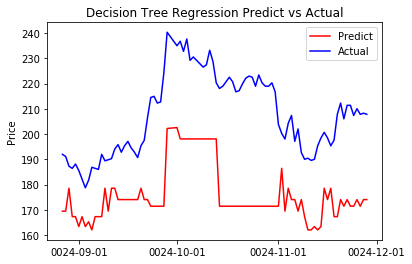

In [186]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt=dt.fit(X_train, y_train)
validate_result(benchmark_dt, 'Decision Tree Regression')

In [187]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [188]:
X_tr_t.shape

(7414, 1, 26)

In [189]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/50
7414/7414 [==============================] - 4s 585us/step - loss: 803.6150
Epoch 2/50
7414/7414 [==============================] - 3s 420us/step - loss: 89.9625
Epoch 3/50
7414/7414 [==============================] - 3s 383us/step - loss: 45.3020
Epoch 4/50
7414/7414 [==============================] - 3s 372us/step - loss: 23.6141
Epoch 5/50
7414/7414 [==============================] - 3s 435us/step - loss: 14.4326
Epoch 6/50
7414/7414 [==============================] - 3s 436us/step - loss: 11.2780
Epoch 7/50
7414/7414 [==============================] - 3s 410us/step - loss: 9.2060
Epoch 8/50
7414/7414 [==============================] - 3s 433us/step - loss: 7.7399
Epoch 9/50
7414/7414 [==============================] - 3s 435us/step - loss: 6.8385
Epoch 10/50
7414/7414 [==============================] - 3s 405us/step - loss: 6.2765
Epoch 11/50
7414/7414 [==============================] - 3s 415us/step - loss: 5.8926
Epoch 12/50
7414/7414 [==============================] -

In [190]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)



The R2 score on the Train set is:	0.995
The R2 score on the Test set is:	0.823


In [191]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

741/741 [==============================] - 1s 1ms/step


In [192]:
print('LSTM: %f'%score_lstm)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

LSTM: 496.062516


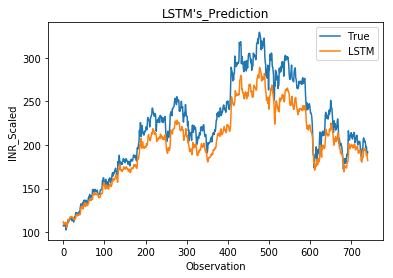

In [193]:

plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


In [26]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'international-airline-passengers.csv'

In [ ]:

f=open('D(面板).') 
df=pd.read_csv(f)     #读入股票数据
data=df.iloc[:,2:10].values   #取第3-10列